In [2]:
import pandas as pd
import networkx as nx
from matplotlib import pyplot as plt
import seaborn as sns

In [86]:
dataset = pd.read_csv('dataset.csv')
dataset

,edge_id,length,minute,speed,is_holiday,weather
0,246,1726,505,22.140185,1,1
1,316,1750,740,54.303369,0,0
2,387,1612,745,56.303877,0,1
3,303,1927,1335,23.641228,0,2
4,250,1901,915,41.503161,0,1
...,...,...,...,...,...,...
784219,221,1851,1015,27.068770,0,1
784220,227,1768,175,47.168667,0,1
784221,110,1699,1220,28.605635,0,1
784222,289,1750,1410,21.889339,0,1


In [23]:
dataset.describe()

,edge_id,length,minute,speed,is_holiday,weather
count,784224.000000,784224.000000,784224.000000,768540.000000,784224.000000,784224.000000
mean,194.876607,1742.886889,717.500000,11.846968,0.142857,0.450133
std,112.482005,144.971298,415.689953,3.568086,0.349927,0.589825
min,0.000000,1501.000000,0.000000,0.914041,0.000000,0.000000
25%,98.000000,1612.000000,358.750000,9.602720,0.000000,0.000000
50%,195.000000,1741.000000,717.500000,11.831092,0.000000,0.000000
75%,292.000000,1865.000000,1076.250000,14.033595,0.000000,1.000000
max,389.000000,2000.000000,1435.000000,38.241785,1.000000,2.000000


هم واحد کردن ستون ها
done✅

In [87]:
# length: meter
# speed: km/h -> should be turned to meter/second (cause we want estimate the weight of each edge with seconds)

dataset['speed'] = dataset['speed'] * 10 / 36
dataset

,edge_id,length,minute,speed,is_holiday,weather
0,246,1726,505,6.150051,1,1
1,316,1750,740,15.084269,0,0
2,387,1612,745,15.639966,0,1
3,303,1927,1335,6.567008,0,2
4,250,1901,915,11.528656,0,1
...,...,...,...,...,...,...
784219,221,1851,1015,7.519103,0,1
784220,227,1768,175,13.102407,0,1
784221,110,1699,1220,7.946010,0,1
784222,289,1750,1410,6.080372,0,1


حذف داده های پرت از سرعت
(باید پیش از جایگزینی مقادیر نن بیاید که روی پر کردن انها تاثیر داده نشوند)
done✅

In [ ]:
# detecting outlayers using z-score and paying attention to factors such as weather and holiday
# removing outlayers in 6 steps because of holiday and weather (2 * 3) 

In [64]:
step1 = pd.DataFrame(dataset[(dataset.is_holiday==0) & (dataset.weather==0)])
step1

,edge_id,length,minute,speed,is_holiday,weather
1,316,1750,740,15.084269,0,0
6,314,1571,675,12.578710,0,0
8,118,1927,1190,8.140236,0,0
17,338,1747,160,15.773128,0,0
19,372,1725,1060,6.069154,0,0
...,...,...,...,...,...,...
784210,326,1755,1390,18.440796,0,0
784211,155,1869,525,12.571544,0,0
784212,39,1999,1385,12.579805,0,0
784215,385,1578,490,9.274834,0,0


In [82]:
# ADDITIONAL

mean1 = step1.speed.mean()
std1 = step1.speed.std()
z1 = step1.speed.apply(lambda x: abs(x-mean1)/std1)
print(z1.describe())

print(z1[z1 > 3])

# print(step1.loc[2071])

dataset.loc[z1[z1>3].index]

count    395101.000000
mean          0.776498
std           0.630119
min           0.000001
25%           0.282379
50%           0.613499
75%           1.127980
max           5.876165
Name: speed, dtype: float64
540       3.209749
2965      4.131990
6296      3.356926
6950      3.056178
7351      3.008358
            ...   
782713    3.105469
782835    3.726618
783481    3.017324
783963    3.558804
784071    3.419245
Name: speed, Length: 1411, dtype: float64


,edge_id,length,minute,speed,is_holiday,weather
540,229,1654,865,22.009954,0,0
2965,123,1927,625,24.813794,0,0
6296,127,1819,750,22.457406,0,0
6950,4,1875,385,21.543059,0,0
7351,272,1975,640,21.397676,0,0
...,...,...,...,...,...,...
782713,301,1861,870,21.692917,0,0
782835,284,1550,510,23.581362,0,0
783481,245,1520,1130,3.078120,0,0
783963,367,1816,255,23.071166,0,0


In [67]:
# dividing the whole time into 4 periods of time with the most change in traffic
# and then removing the outlayers from each one
# doing the same with step2, step3 and step4

# from midnight to 6 AM (0 to 360) -> step1_1
# from 6 AM to 3 PM (360 to 900) -> step1_2
# from 3 PM to 6 PM (900 to 1080) -> step1_3
# from 6 PM to midnight (1080 to 1440) -> step1_4

step1_1 = step1[(0<step1.minute) & (step1.minute<360)]
step1_1

,edge_id,length,minute,speed,is_holiday,weather
17,338,1747,160,15.773128,0,0
27,61,1894,105,15.886921,0,0
29,174,1674,320,17.136337,0,0
35,283,1862,25,15.815133,0,0
38,246,1726,330,12.760582,0,0
...,...,...,...,...,...,...
784171,10,1633,190,16.599948,0,0
784172,325,1938,340,11.818392,0,0
784188,75,1627,50,18.272743,0,0
784192,245,1520,5,18.215388,0,0


In [88]:
# removing outlayers from step1_1

mean1_1 = step1_1.speed.mean()
std1_1 = step1_1.speed.std()
z1_1 = step1_1.speed.apply(lambda x: abs(x-mean1_1)/std1_1)
z1_1.describe()

count    97407.000000
mean         0.773321
std          0.634010
min          0.000014
25%          0.305196
50%          0.638839
75%          1.082181
max          6.312340
Name: speed, dtype: float64

In [89]:
# dataset.loc[z1_1[z1_1>3].index] -> for seeing the ones that would are removed in the line below

dataset.drop(z1_1[z1_1>3].index, inplace=True)
dataset

,edge_id,length,minute,speed,is_holiday,weather
0,246,1726,505,6.150051,1,1
1,316,1750,740,15.084269,0,0
2,387,1612,745,15.639966,0,1
3,303,1927,1335,6.567008,0,2
4,250,1901,915,11.528656,0,1
...,...,...,...,...,...,...
784219,221,1851,1015,7.519103,0,1
784220,227,1768,175,13.102407,0,1
784221,110,1699,1220,7.946010,0,1
784222,289,1750,1410,6.080372,0,1


In [90]:
step1_2 = step1[(360<step1.minute) & (step1.minute<900)]
step1_2

,edge_id,length,minute,speed,is_holiday,weather
1,316,1750,740,15.084269,0,0
6,314,1571,675,12.578710,0,0
22,348,1905,430,11.127547,0,0
28,32,1964,670,9.131027,0,0
31,64,1887,875,15.766031,0,0
...,...,...,...,...,...,...
784193,17,1874,835,12.596597,0,0
784206,1,1848,490,10.043592,0,0
784211,155,1869,525,12.571544,0,0
784215,385,1578,490,9.274834,0,0


In [93]:
mean1_2 = step1_2.speed.mean()
std1_2 = step1_2.speed.std()
z1_2 = step1_2.speed.apply(lambda x: abs(x-mean1_2)/std1_2)
print(z1_2.describe())
dataset.drop(z1_2[z1_2>3].index, inplace=True)
dataset

count    146782.000000
mean          0.775939
std           0.630805
min           0.000011
25%           0.303370
50%           0.640468
75%           1.082313
max           7.019373
Name: speed, dtype: float64


,edge_id,length,minute,speed,is_holiday,weather
0,246,1726,505,6.150051,1,1
1,316,1750,740,15.084269,0,0
2,387,1612,745,15.639966,0,1
3,303,1927,1335,6.567008,0,2
4,250,1901,915,11.528656,0,1
...,...,...,...,...,...,...
784219,221,1851,1015,7.519103,0,1
784220,227,1768,175,13.102407,0,1
784221,110,1699,1220,7.946010,0,1
784222,289,1750,1410,6.080372,0,1


In [96]:
step1_3 = step1[(900<step1.minute) & (step1.minute<1080)]
mean1_3 = step1_3.speed.mean()
std1_3 = step1_3.speed.std()
z1_3 = step1_3.speed.apply(lambda x: abs(x-mean1_3)/std1_3)
dataset.drop(z1_3[z1_3>3].index, inplace=True)

step1_4 = step1[(1080<step1.minute) & (step1.minute<1440)]
mean1_4 = step1_4.speed.mean()
std1_4 = step1_4.speed.std()
z1_4 = step1_4.speed.apply(lambda x: abs(x-mean1_4)/std1_4)
dataset.drop(z1_4[z1_4>3].index, inplace=True)

In [ ]:
# finished with step1, doing the same with step2 to step 6

In [98]:
step2 = pd.DataFrame(dataset[(dataset.is_holiday==1) & (dataset.weather==0)])

# step2_1: indicates that the holiday is now 1 (step2) and the time is from midnight to 6 AM
step2_1 = step2[(0<step2.minute) & (step2.minute<360)]
mean2_1 = step2_1.speed.mean()
std2_1 = step2_1.speed.std()
z2_1 = step2_1.speed.apply(lambda x: abs(x-mean2_1)/std2_1)
dataset.drop(z2_1[z2_1>3].index, inplace=True)

step2_2 = step2[(360<step2.minute) & (step2.minute<900)]
mean2_2 = step2_2.speed.mean()
std2_2 = step2_2.speed.std()
z2_2 = step2_2.speed.apply(lambda x: abs(x-mean2_2)/std2_2)
dataset.drop(z2_2[z2_2>3].index, inplace=True)

step2_3 = step2[(900<step2.minute) & (step2.minute<1080)]
mean2_3 = step2_3.speed.mean()
std2_3 = step2_3.speed.std()
z2_3 = step2_3.speed.apply(lambda x: abs(x-mean2_3)/std2_3)
dataset.drop(z2_3[z2_3>3].index, inplace=True)

step2_4 = step2[(1080<step2.minute) & (step2.minute<1440)]
mean2_4 = step2_4.speed.mean()
std2_4 = step2_4.speed.std()
z2_4 = step2_4.speed.apply(lambda x: abs(x-mean2_4)/std2_4)
dataset.drop(z2_4[z2_4>3].index, inplace=True)
dataset

,edge_id,length,minute,speed,is_holiday,weather
0,246,1726,505,6.150051,1,1
1,316,1750,740,15.084269,0,0
2,387,1612,745,15.639966,0,1
3,303,1927,1335,6.567008,0,2
4,250,1901,915,11.528656,0,1
...,...,...,...,...,...,...
784219,221,1851,1015,7.519103,0,1
784220,227,1768,175,13.102407,0,1
784221,110,1699,1220,7.946010,0,1
784222,289,1750,1410,6.080372,0,1


In [ ]:
# finished with step2 and moving on to the next steps

In [99]:
# step3

step3 = pd.DataFrame(dataset[(dataset.is_holiday==0) & (dataset.weather==1)])

step3_1 = step3[(0<step3.minute) & (step3.minute<360)]
mean3_1 = step3_1.speed.mean()
std3_1 = step3_1.speed.std()
z3_1 = step3_1.speed.apply(lambda x: abs(x-mean3_1)/std3_1)
dataset.drop(z3_1[z3_1>3].index, inplace=True)

step3_2 = step3[(360<step3.minute) & (step3.minute<900)]
mean3_2 = step3_2.speed.mean()
std3_2 = step3_2.speed.std()
z3_2 = step3_2.speed.apply(lambda x: abs(x-mean3_2)/std3_2)
dataset.drop(z3_2[z3_2>3].index, inplace=True)

step3_3 = step3[(900<step3.minute) & (step3.minute<1080)]
mean3_3 = step3_3.speed.mean()
std3_3 = step3_3.speed.std()
z3_3 = step3_3.speed.apply(lambda x: abs(x-mean3_3)/std3_3)
dataset.drop(z3_3[z3_3>3].index, inplace=True)

step3_4 = step3[(1080<step3.minute) & (step3.minute<1440)]
mean3_4 = step3_4.speed.mean()
std3_4 = step3_4.speed.std()
z3_4 = step3_4.speed.apply(lambda x: abs(x-mean3_4)/std3_4)
dataset.drop(z3_4[z3_4>3].index, inplace=True)

In [100]:
# step4

step4 = pd.DataFrame(dataset[(dataset.is_holiday==1) & (dataset.weather==1)])

step4_1 = step4[(0<step4.minute) & (step4.minute<360)]
mean4_1 = step4_1.speed.mean()
std4_1 = step4_1.speed.std()
z4_1 = step4_1.speed.apply(lambda x: abs(x-mean4_1)/std4_1)
dataset.drop(z4_1[z4_1>3].index, inplace=True)

step4_2 = step4[(360<step4.minute) & (step4.minute<900)]
mean4_2 = step4_2.speed.mean()
std4_2 = step4_2.speed.std()
z4_2 = step4_2.speed.apply(lambda x: abs(x-mean4_2)/std4_2)
dataset.drop(z4_2[z4_2>3].index, inplace=True)

step4_3 = step4[(900<step4.minute) & (step4.minute<1080)]
mean4_3 = step4_3.speed.mean()
std4_3 = step4_3.speed.std()
z4_3 = step4_3.speed.apply(lambda x: abs(x-mean4_3)/std4_3)
dataset.drop(z4_3[z4_3>3].index, inplace=True)

step4_4 = step4[(1080<step4.minute) & (step4.minute<1440)]
mean4_4 = step4_4.speed.mean()
std4_4 = step4_4.speed.std()
z4_4 = step4_4.speed.apply(lambda x: abs(x-mean4_4)/std4_4)
dataset.drop(z4_4[z4_4>3].index, inplace=True)

In [101]:
# step5

step5 = pd.DataFrame(dataset[(dataset.is_holiday==0) & (dataset.weather==2)])

step5_1 = step5[(0<step5.minute) & (step5.minute<360)]
mean5_1 = step5_1.speed.mean()
std5_1 = step5_1.speed.std()
z5_1 = step5_1.speed.apply(lambda x: abs(x-mean5_1)/std5_1)
dataset.drop(z5_1[z5_1>3].index, inplace=True)

step5_2 = step5[(360<step5.minute) & (step5.minute<900)]
mean5_2 = step5_2.speed.mean()
std5_2 = step5_2.speed.std()
z5_2 = step5_2.speed.apply(lambda x: abs(x-mean5_2)/std5_2)
dataset.drop(z5_2[z5_2>3].index, inplace=True)

step5_3 = step5[(900<step5.minute) & (step5.minute<1080)]
mean5_3 = step5_3.speed.mean()
std5_3 = step5_3.speed.std()
z5_3 = step5_3.speed.apply(lambda x: abs(x-mean5_3)/std5_3)
dataset.drop(z5_3[z5_3>3].index, inplace=True)

step5_4 = step5[(1080<step5.minute) & (step5.minute<1440)]
mean5_4 = step5_4.speed.mean()
std5_4 = step5_4.speed.std()
z5_4 = step5_4.speed.apply(lambda x: abs(x-mean5_4)/std5_4)
dataset.drop(z5_4[z5_4>3].index, inplace=True)

In [102]:
# step6

step6 = pd.DataFrame(dataset[(dataset.is_holiday==1) & (dataset.weather==2)])

step6_1 = step6[(0<step6.minute) & (step6.minute<360)]
mean6_1 = step6_1.speed.mean()
std6_1 = step6_1.speed.std()
z6_1 = step6_1.speed.apply(lambda x: abs(x-mean6_1)/std6_1)
dataset.drop(z6_1[z6_1>3].index, inplace=True)

step6_2 = step6[(360<step6.minute) & (step6.minute<900)]
mean6_2 = step6_2.speed.mean()
std6_2 = step6_2.speed.std()
z6_2 = step6_2.speed.apply(lambda x: abs(x-mean6_2)/std6_2)
dataset.drop(z6_2[z6_2>3].index, inplace=True)

step6_3= step6[(900<step6.minute) & (step6.minute<1080)]
mean6_3 = step6_3.speed.mean()
std6_3 = step6_3.speed.std()
z6_3 = step6_3.speed.apply(lambda x: abs(x-mean6_3)/std6_3)
dataset.drop(z6_3[z6_3>3].index, inplace=True)

step6_4 = step6[(1080<step6.minute) & (step6.minute<1440)]
mean6_4 = step6_4.speed.mean()
std6_4 = step6_4.speed.std()
z6_4 = step6_4.speed.apply(lambda x: abs(x-mean6_4)/std6_4)
dataset.drop(z6_4[z6_4>3].index, inplace=True)

dataset

,edge_id,length,minute,speed,is_holiday,weather
0,246,1726,505,6.150051,1,1
1,316,1750,740,15.084269,0,0
2,387,1612,745,15.639966,0,1
3,303,1927,1335,6.567008,0,2
4,250,1901,915,11.528656,0,1
...,...,...,...,...,...,...
784219,221,1851,1015,7.519103,0,1
784220,227,1768,175,13.102407,0,1
784221,110,1699,1220,7.946010,0,1
784222,289,1750,1410,6.080372,0,1


جایگزین کردن مقادیر خالی در سرعت

In [104]:
dataset.isnull().sum()

edge_id           0
length            0
minute            0
speed         15684
is_holiday        0
weather           0
dtype: int64

In [103]:
dataset[dataset.isna().any(axis=1)]

,edge_id,length,minute,speed,is_holiday,weather
48,306,1934,1210,NaN,0,1
123,53,1634,1165,NaN,0,0
131,383,1895,675,NaN,0,1
138,186,1507,380,NaN,0,1
245,360,1641,860,NaN,0,0
...,...,...,...,...,...,...
783985,152,1833,615,NaN,0,0
783989,155,1869,115,NaN,0,0
784033,296,1836,810,NaN,0,1
784057,177,1567,950,NaN,0,1


In [15]:
dataset[(dataset.minute==1210) & (dataset.edge_id==306)]

,edge_id,length,minute,speed,is_holiday,weather
48,306,1934,1210,NaN,0,1
35894,306,1934,1210,16.782754,0,2
106332,306,1934,1210,25.923647,0,0
118011,306,1934,1210,13.911278,0,2
527763,306,1934,1210,21.235374,1,1
548247,306,1934,1210,20.128327,0,0
668157,306,1934,1210,20.618301,0,1


وزن دادن به یال ها

In [105]:
dataset.groupby(['speed']).mean()

,edge_id,length,minute,is_holiday,weather
speed,,,,,
0.914041,302.0,1796.0,1165.0,0.0,2.0
0.976728,266.0,1584.0,1150.0,0.0,2.0
1.162628,185.0,1853.0,1160.0,0.0,2.0
1.174509,304.0,1595.0,1200.0,0.0,2.0
1.202076,105.0,1660.0,1085.0,0.0,2.0
...,...,...,...,...,...
30.045133,16.0,1736.0,0.0,1.0,1.0
31.864072,356.0,1739.0,0.0,1.0,0.0
35.161945,130.0,1547.0,0.0,1.0,0.0


In [21]:
a = dataset.groupby('edge_id')
a.head()

,edge_id,length,minute,speed,is_holiday,weather
0,246,1726,505,6.150051,1,1
1,316,1750,740,15.084269,0,0
2,387,1612,745,15.639966,0,1
3,303,1927,1335,6.567008,0,2
4,250,1901,915,11.528656,0,1
...,...,...,...,...,...,...
4662,235,1946,915,16.938142,1,0
4683,291,1577,1145,3.934940,0,2
4809,79,1615,120,17.187446,0,0
5190,79,1615,70,NaN,0,1


استخراج گره های مجاور و اطلاعات از گراف

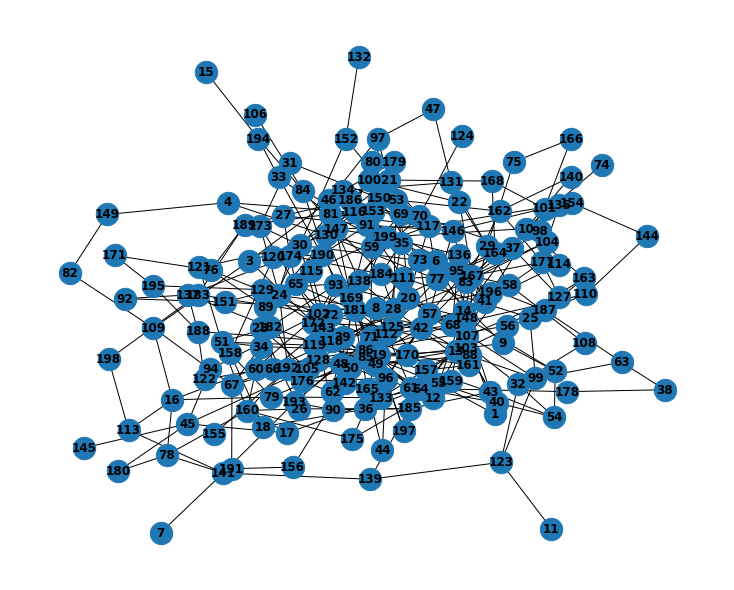

In [109]:
graph = nx.read_gpickle('network.gpickle')
plt.figure(3,figsize=(10,8)) 
nx.draw(graph, with_labels=True, node_size=500, font_weight='bold')
plt.show()

In [27]:
from pyvis.network import Network

net=Network(notebook=True)
net.from_nx(graph)
net.show(name="example.html")

In [111]:
# لیست برای مجاور ها

adj_dic = nx.to_dict_of_lists(graph)
adj_dic

{1: [55, 107],
 3: [172, 109, 134, 130],
 4: [149, 130, 116],
 6: [14],
 7: [141],
 8: [61, 172, 95, 72, 73, 24],
 9: [77, 52, 170],
 10: [74, 114, 163, 14, 199, 140],
 11: [123],
 12: [107, 85, 49],
 13: [99, 103, 58, 49, 19, 133, 83],
 14: [196, 58, 71, 10, 55, 43, 118, 114, 6],
 15: [194],
 16: [60, 79, 78, 109, 113],
 17: [160, 61, 45],
 18: [36, 158],
 19: [142, 105, 190, 197, 13, 61],
 20: [32, 107, 117, 102, 69, 147, 128],
 21: [174, 97, 168, 70],
 22: [29, 167, 100],
 23: [105, 30, 26, 129],
 24: [192, 173, 8],
 25: [110, 99, 111],
 26: [160, 23, 185],
 27: [65, 91],
 28: [53, 184, 161, 138, 192, 196, 142],
 29: [107, 75, 22, 57],
 30: [73, 121, 143, 152, 23, 173],
 31: [173, 150, 33],
 32: [20, 54, 108, 123],
 33: [31, 81, 190, 194],
 34: [160, 174, 51, 86, 67],
 35: [95, 116, 112, 184, 179],
 36: [18, 175, 57, 90, 64],
 37: [127, 167, 70, 95],
 38: [63, 178],
 39: [62, 67, 65, 83, 125],
 40: [55, 43, 54, 103, 88, 64],
 41: [101, 73, 177, 167, 185, 42],
 42: [164, 88, 172, 50,

تست کد

In [24]:
testcases = pd.read_csv('test_cases.csv')
testcases

,src,dest,route_start_t,is_holiday,weather,eta,route
0,27,90,521,0,0,NaN,NaN
1,60,114,835,1,2,NaN,NaN
2,18,112,668,0,0,NaN,NaN
3,96,18,1114,0,2,NaN,NaN
4,66,135,1116,0,0,NaN,NaN
...,...,...,...,...,...,...,...
9995,82,194,605,0,0,NaN,NaN
9996,75,159,497,0,1,NaN,NaN
9997,14,176,712,0,0,NaN,NaN
9998,14,77,1136,0,0,NaN,NaN
